# Thesis Plotter

## Imports and Methods

In [33]:
import ROOT
import my_library.common_analysis_tools as tools
import my_library.kinematic_cuts as cuts
import my_library.constants as constants
import my_library.gluex_style as gxs

In [34]:
def title_hists(hist: list, xtitle, ytitle, yoffset=None):
    titled_hists = []
    for hist in hist:
        hist.GetXaxis().SetTitle(xtitle)
        hist.GetYaxis().SetTitle(ytitle)
        if yoffset:
            hist.GetYaxis().SetTitleOffset(yoffset)

    

# Make Plots for My Thesis 

In [35]:
ROOT.EnableImplicitMT()

In [36]:
df_pipkmks = tools.get_dataframe('pipkmks', 'gluex1', 'data', filtered=False)
df_pimkpks = tools.get_dataframe('pimkpks', 'gluex1', 'data', filtered=False)

## $M^{2}_{x}(pKK\pi)$

In [37]:
mx2_all_bins, mx2_all_xlow, mx2_all_xhigh = 1000, -0.1, 0.1
hist_mx2all_pipkmks = df_pipkmks.Histo1D(('mx2_all_pipkmks', 'mx2_all_pipkmks', mx2_all_bins, mx2_all_xlow, mx2_all_xhigh ), 'mx2_ppipkmks')
hist_mx2all_pimkpks = df_pimkpks.Histo1D(('mx2_all_pimkpks', 'mx2_all_pimkpks', mx2_all_bins, mx2_all_xlow, mx2_all_xhigh ), 'mx2_ppimkpks')

hist_mx2all_pipkmks_cut = df_pipkmks.Filter(cuts.MX2_PPIPKMKS_CUT).Histo1D(('mx2_all_pipkmks_cut', 'mx2_all_pipkmks_cut', mx2_all_bins, mx2_all_xlow, mx2_all_xhigh ), 'mx2_ppipkmks')
hist_mx2all_pimkpks_cut = df_pimkpks.Filter(cuts.MX2_PPIMKPKS_CUT).Histo1D(('mx2_all_pimkpks_cut', 'mx2_all_pimkpks_cut', mx2_all_bins, mx2_all_xlow, mx2_all_xhigh ), 'mx2_ppimkpks')

In [38]:
df_pipkmks = df_pipkmks.Filter(cuts.MX2_PPIPKMKS_CUT)
df_pimkpks = df_pimkpks.Filter(cuts.MX2_PPIMKPKS_CUT)


## $\vec{p}(p')$

In [39]:
pp_bins, pp_xlow, pp_xhigh = 200, 0, 1.9
hist_trange_pipkmks = df_pipkmks.Histo1D(('trange_pipkmks', 'trange_pipkmks', pp_bins, pp_xlow, pp_xhigh ), 'mand_t')
hist_trange_pimkpks = df_pimkpks.Histo1D(('trange_pimkpks', 'trange_pimkpks', pp_bins, pp_xlow, pp_xhigh ), 'mand_t')
hist_trange_pipkmks_cut = df_pipkmks.Filter(cuts.P_P_CUT).Histo1D(('trange_pipkmks_cut', 'trange_pipkmks_cut', pp_bins, pp_xlow, pp_xhigh ), 'mand_t')

In [40]:
df_pipkmks = df_pipkmks.Filter(cuts.P_P_CUT)
df_pimkpks = df_pimkpks.Filter(cuts.P_P_CUT)

## $K_s$ Pathlength $\Delta r/\sigma_r$

In [41]:
ks_bins, ks_xlow, ks_xhigh = 1000, 0.35, 0.65

hist_ks_pipkmks = df_pipkmks.Histo1D(('ks_pipkmks', 'ks_pipkmks', ks_bins, ks_xlow, ks_xhigh ), 'ks_m')
hist_ks_pimkpks = df_pimkpks.Histo1D(('ks_pimkpks', 'ks_pimkpks', ks_bins, ks_xlow, ks_xhigh ), 'ks_m')

hist_ks_pipkmks_cut = df_pipkmks.Filter(cuts.KS_PATHLENGTH_CUT).Histo1D(('ks_pipkmks_cut', 'ks_pipkmks_cut', ks_bins, ks_xlow, ks_xhigh ), 'ks_m')
hist_ks_pimkpks_cut = df_pimkpks.Filter(cuts.KS_PATHLENGTH_CUT).Histo1D(('ks_pimkpks_cut', 'ks_pimkpks_cut', ks_bins, ks_xlow, ks_xhigh ), 'ks_m')

# Draw Plots

In [42]:
path_to_plots = '/work/halld/home/viducic/plots/thesis/'

In [43]:
c = ROOT.TCanvas('c', 'c', 900, 900)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


## $M^{2}_{x}(pKK\pi)$

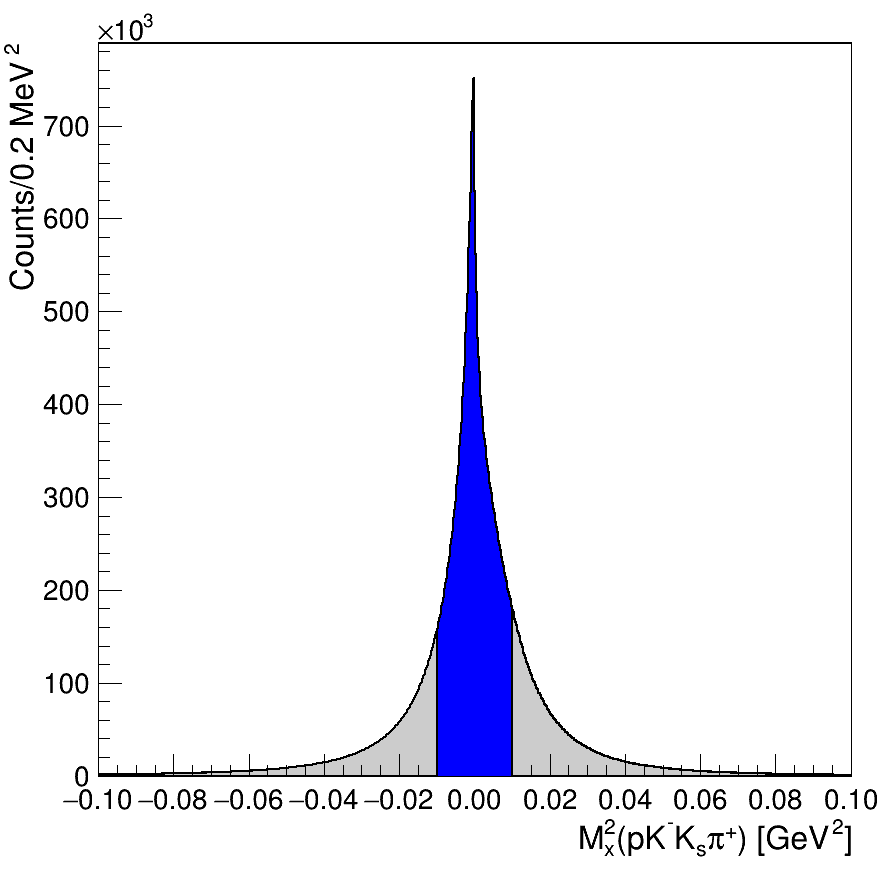

In [47]:
c.Clear()
# c.Divide(2,1)

# mx2all_xtitle = 'M_{x}^{2}(pKK#pi) [GeV^{2}]'
hist_mx2all_pipkmks.GetXaxis().SetTitle('M_{x}^{2}(pK^{-}K_{s}#pi^{+}) [GeV^{2}]')
# mx2all_ytitle = f'Counts/{1000*(mx2_all_xhigh-mx2_all_xlow)/mx2_all_bins:.3f}' + ' MeV^{2}'
hist_mx2all_pipkmks.GetYaxis().SetTitle(f'Counts/{1000*(mx2_all_xhigh-mx2_all_xlow)/mx2_all_bins:.1f}' +  ' MeV^{2}')
hist_mx2all_pipkmks_cut.SetFillColor(ROOT.kBlue)
hist_mx2all_pipkmks.GetYaxis().SetTitleOffset(1.4)
# hist_mx2all_pipkmks.GetXaxis().SetTitleSize(0.05)
hist_mx2all_pipkmks.GetXaxis().SetTitleOffset(1.1)


hist_mx2all_pimkpks.GetXaxis().SetTitle('M_{x}^{2}(pK^{+}K_{s}#pi^{-}) [GeV^{2}]')
hist_mx2all_pimkpks.GetYaxis().SetTitle(f'Counts/{1000*(mx2_all_xhigh-mx2_all_xlow)/mx2_all_bins:.1f}' +  ' MeV^{2}')
hist_mx2all_pimkpks_cut.SetFillColor(ROOT.kRed)
hist_mx2all_pimkpks.GetYaxis().SetTitleOffset(1.54)

# title_hists([hist_mx2all_pimkpks, hist_mx2all_pipkmks], mx2all_xtitle, mx2all_ytitle)
# title_hists([hist_mx2all_pimkpks_cut, hist_mx2all_pipkmks_cut], mx2all_xtitle, mx2all_ytitle)
c.cd(1)
hist_mx2all_pipkmks.Draw()
hist_mx2all_pipkmks_cut.Draw('same')
# c.cd(2)
# hist_mx2all_pimkpks.Draw()
# hist_mx2all_pimkpks_cut.Draw('same')

c.Draw()


## $\vec{p}(p')$

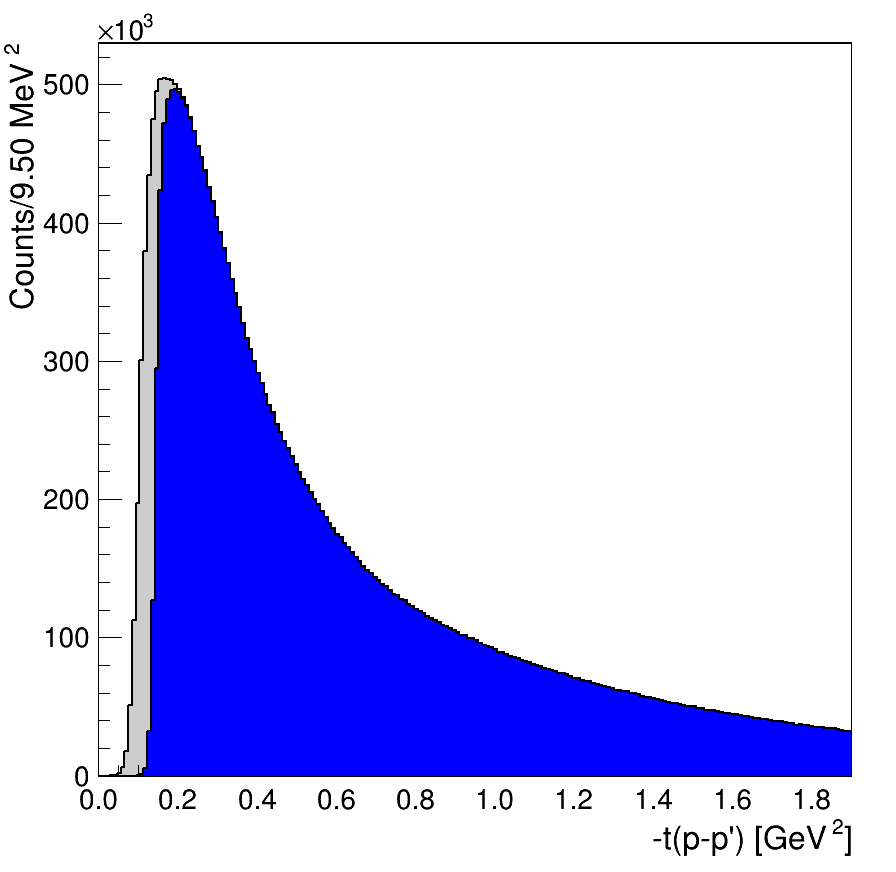

In [45]:
c.Clear()
pp_xtitle = "-t(p-p') [GeV^{2}]"
pp_ytitle = f'Counts/{1000*(pp_xhigh-pp_xlow)/pp_bins:.2f}' + ' MeV^{2}'

title_hists([hist_trange_pipkmks, hist_trange_pipkmks_cut], pp_xtitle, pp_ytitle, yoffset=1.4)

hist_trange_pipkmks_cut.SetFillColor(ROOT.kBlue)

hist_trange_pipkmks.Draw()
hist_trange_pipkmks_cut.Draw('same')
c.Draw()


## Pathlength $\Delta r/\sigma_r$

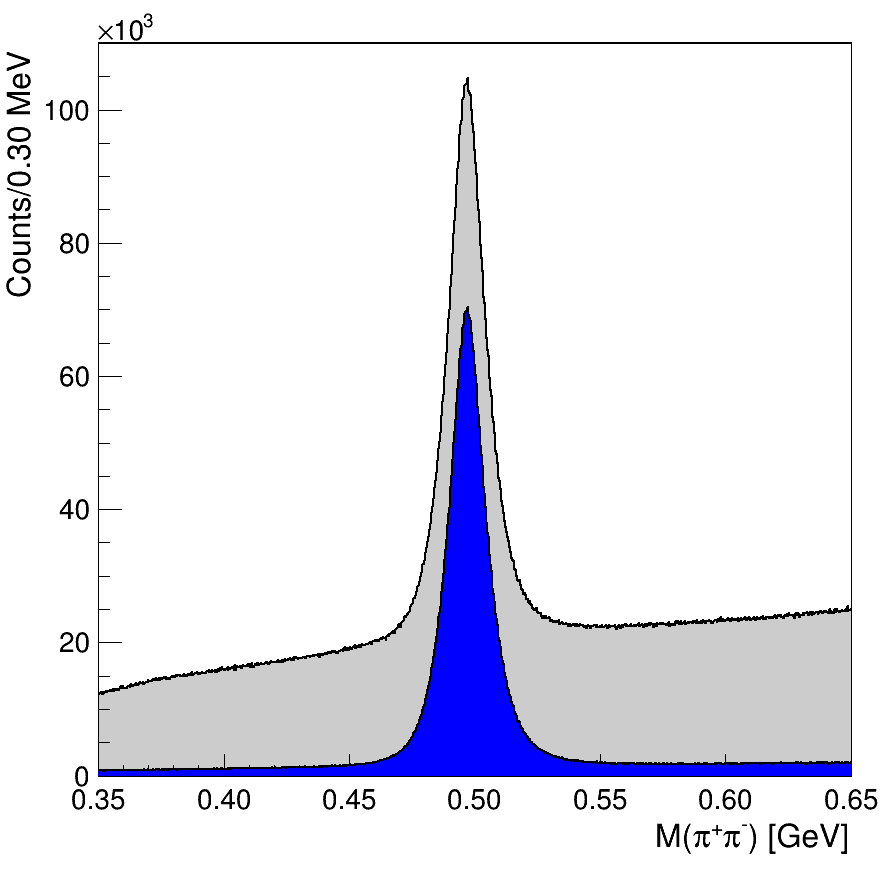

In [46]:
c.Clear()

ks_xtitle = 'M(#pi^{+}#pi^{-}) [GeV]'
ks_ytitle = f'Counts/{1000*(ks_xhigh-ks_xlow)/ks_bins:.2f}' + ' MeV'

title_hists([hist_ks_pipkmks, hist_ks_pipkmks_cut], ks_xtitle, ks_ytitle, yoffset=1.4)


hist_ks_pipkmks_cut.SetFillColor(ROOT.kBlue)
hist_ks_pipkmks.GetYaxis().SetRangeUser(0, 1.05*hist_ks_pipkmks.GetMaximum())

hist_ks_pipkmks.Draw()
hist_ks_pipkmks_cut.Draw('same')
c.Draw()